In [1]:
# -*- coding:utf-8 -*-  


import pandas as pd 
import matplotlib.pylab as plt
import numpy as np

train=pd.read_csv('E:/medical/d_train_20180102.csv',index_col=None,encoding='gb2312')#改了编码文件名中不能有汉字
test=pd.read_csv('E:/medical/d_test_A_20180102.csv',index_col=None,encoding='gb2312')
# test=pd.read_excel('../data/testA.xlsx',index_col=0,encoding='utf-8')
train1=train.copy();test1=test.copy()


In [96]:
d_i=[]
for i in range(len(train)):

    if (i%4==0 ) & (train.iloc[i,-1]<7):##2,5,12,20
        d_i.append(i)
print(len(d_i))        
train.drop(d_i,inplace=True)

1681


In [8]:
df=train[(train['血糖']>6.5)]

In [125]:
df=train[(train['甘油三酯']>0)|(train['血糖']>7)&(train['甘油三酯']>0)]##一次

In [126]:
train=pd.concat([train,df],keys=None)


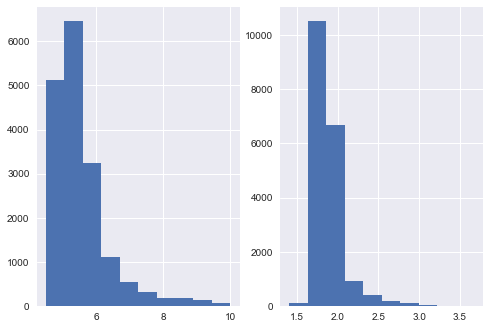

18911


In [127]:
       
plt.subplot(121)
plt.hist(train.血糖,range=[4.5,10])
#房价的分布图
plt.subplot(122)
plt.hist(np.log1p(train.血糖))
#对房价进行对数log1p 是log(1+x)防止有0

plt.show()
print(len(train))


In [128]:
train.drop('id',axis=1,inplace=True)

test.drop('id',axis=1,inplace=True)

In [129]:

print(len(train.columns))
print(len(train),len(test))

numeric_feats=train.dtypes[train.dtypes!="object"].index
categorical_feats=train.dtypes[train.dtypes=="object"].index
print(len(numeric_feats),len(categorical_feats))
print(categorical_feats)
print(numeric_feats)

41
18911 1000
39 2
Index(['性别', '体检日期'], dtype='object')
Index(['年龄', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白',
       '*球蛋白', '白球比例', '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐',
       '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数',
       '血红蛋白', '红细胞压积', '红细胞平均体积', '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度',
       '血小板计数', '血小板平均体积', '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%',
       '嗜酸细胞%', '嗜碱细胞%', '血糖'],
      dtype='object')


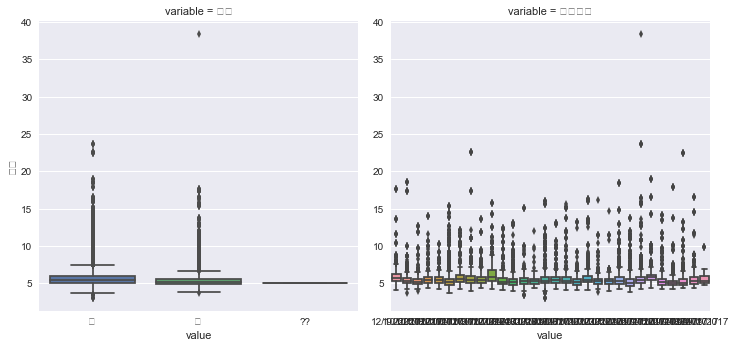

In [130]:
##查看类别特征与血糖
categorical_feats=train.dtypes[train.dtypes=="object"].index

import seaborn as sns 
for c in categorical_feats:
    train[c]=train[c].astype('category')
    if train[c].isnull().any():
        train[c]=train[c].cat.add_categories(["Missing"])
        train[c]=train[c].fillna("Missing")
        
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
f=pd.melt(train,id_vars=["血糖"],value_vars=categorical_feats)
g=sns.FacetGrid(f,col='variable',col_wrap=3,sharex=False,sharey=False,size=5)
g=g.map(boxplot,"value","血糖")

plt.show()

In [108]:
#有一个点血糖太高了
##删行
###使用log得改值
train.drop(train[train["血糖"]>30].index,inplace=True)


In [131]:
##性别有个多余的
train.drop(train[(train['性别']=='??')].index,inplace=True)


In [132]:
numeric_feats=numeric_feats.drop("血糖")##对数值型特征进行可视化时，要把自己删喽

38


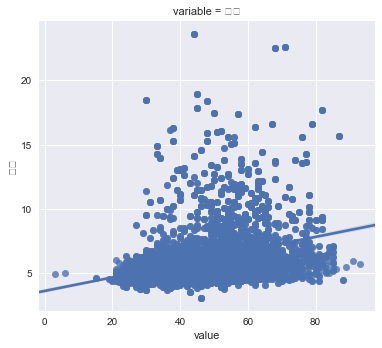

In [22]:
##查看数值型特征与血糖的关系

def jointplot(x,y,**kwargs):
    try:
        sns.regplot(x=x,y=y)
    except Exception:
        print(x.value_counts())

f=pd.melt(train,id_vars=["血糖"],value_vars=numeric_feats[:1])
# print(numeric_feats)
print(len(numeric_feats))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False,size=5)
g=g.map(jointplot,'value','血糖')
plt.show()




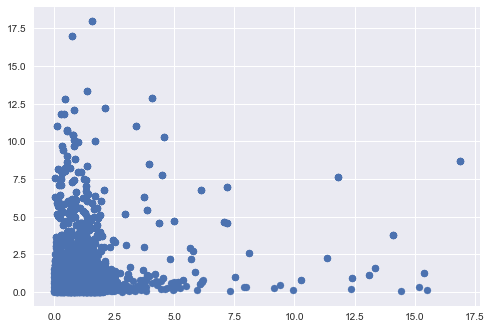

In [32]:
plt.scatter(np.abs(train['甘油三酯']-2.5),np.abs(train['血糖']-5.6))
plt.show()

In [18]:
print(numeric_feats)

Index(['年龄', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白',
       '*球蛋白', '白球比例', '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐',
       '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数',
       '血红蛋白', '红细胞压积', '红细胞平均体积', '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度',
       '血小板计数', '血小板平均体积', '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%',
       '嗜酸细胞%', '嗜碱细胞%'],
      dtype='object')


In [111]:
train.drop(train[train[numeric_feats[1]]>200].index,inplace=True)
train.drop(train[train[numeric_feats[2]]>250].index,inplace=True)
train.drop(train[train[numeric_feats[3]]>270].index,inplace=True)
train.drop(train[train[numeric_feats[4]]>400].index,inplace=True)

train.drop(train[train[numeric_feats[5]]>95].index,inplace=True)
train.drop(train[train[numeric_feats[7]]>50].index,inplace=True)
train.drop(train[train[numeric_feats[7]]<10].index,inplace=True)
train.drop(train[train[numeric_feats[8]]>6].index,inplace=True)
train.drop(train[train[numeric_feats[9]]>20].index,inplace=True)
train.drop(train[train[numeric_feats[10]]>10].index,inplace=True)
train.drop(train[train[numeric_feats[16]]>1].index,inplace=True)
train.drop(train[train[numeric_feats[18]]>7].index,inplace=True)
train.drop(train[train[numeric_feats[21]]>20].index,inplace=True)
train.drop(train[train[numeric_feats[27]]>380].index,inplace=True)
train.drop(train[train[numeric_feats[29]]>550].index,inplace=True)
train.drop(train[train[numeric_feats[32]]>0.6].index,inplace=True)

train.drop(train[train[numeric_feats[34]]>70].index,inplace=True)
train.drop(train[train[numeric_feats[35]]>20].index,inplace=True)
train.drop(train[train[numeric_feats[36]]>14].index,inplace=True)
train.drop(train[train[numeric_feats[37]]>2.2].index,inplace=True)



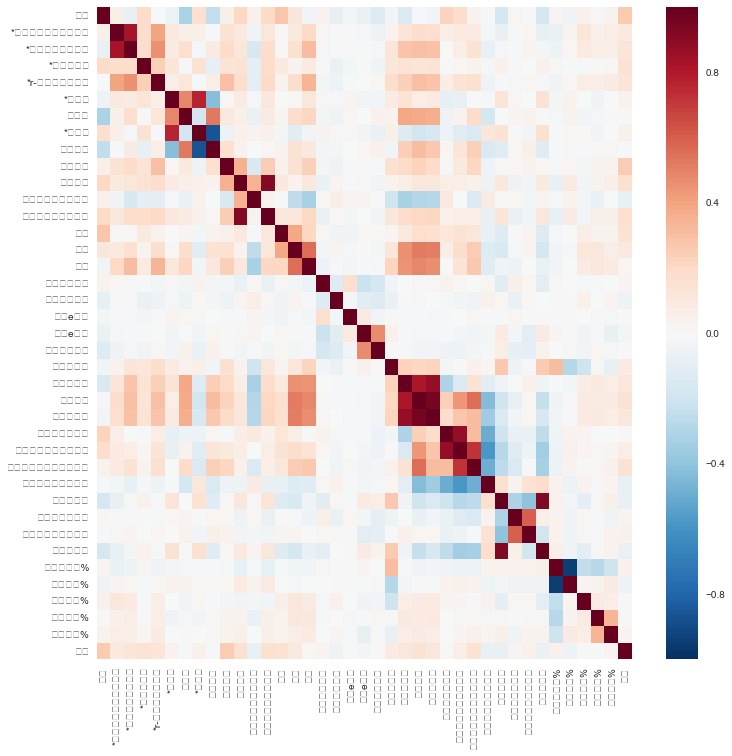

Index(['年龄', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白',
       '*球蛋白', '白球比例', '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐',
       '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数',
       '血红蛋白', '红细胞压积', '红细胞平均体积', '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度',
       '血小板计数', '血小板平均体积', '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%',
       '嗜酸细胞%', '嗜碱细胞%', '血糖'],
      dtype='object')


In [133]:


plt.subplots(figsize=(12,12))
corrmat=train.corr()
g=sns.heatmap(corrmat)
plt.show()
print(corrmat.columns)

In [113]:


print(corrmat.columns[[1,5,7,12,14,15,23,24,26,27,33,34]])
train.drop(corrmat.columns[[1,5,7,12,14,15,23,24,26,27,33,34]],axis=1,inplace=True)
test.drop(corrmat.columns[[1,5,7,12,14,15,23,24,26,27,33,34]],axis=1,inplace=True)
print(train.columns)
print(test.columns)

Index(['*天门冬氨酸氨基转换酶', '*总蛋白', '*球蛋白', '低密度脂蛋白胆固醇', '肌酐', '尿酸', '血红蛋白', '红细胞压积',
       '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '中性粒细胞%', '淋巴细胞%'],
      dtype='object')
Index(['性别', '年龄', '体检日期', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '白蛋白', '白球比例',
       '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '尿素', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体',
       '乙肝核心抗体', '白细胞计数', '红细胞计数', '红细胞平均体积', '红细胞体积分布宽度', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%', '血糖'],
      dtype='object')
Index(['性别', '年龄', '体检日期', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '白蛋白', '白球比例',
       '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '尿素', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体',
       '乙肝核心抗体', '白细胞计数', '红细胞计数', '红细胞平均体积', '红细胞体积分布宽度', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%'],
      dtype='object')


In [114]:

train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

乙肝e抗体         13345
乙肝核心抗体        13345
乙肝表面抗原        13345
乙肝表面抗体        13345
乙肝e抗原         13345
尿素             2661
*碱性磷酸酶         1383
*r-谷氨酰基转换酶     1383
白蛋白            1383
白球比例           1383
*丙氨酸氨基转换酶      1383
高密度脂蛋白胆固醇      1212
总胆固醇           1212
甘油三酯           1212
血小板平均体积          92
血小板体积分布宽度        92
血小板比积            92
白细胞计数            64
嗜酸细胞%            64
红细胞计数            64
红细胞平均体积          64
红细胞体积分布宽度        64
血小板计数            64
单核细胞%            64
嗜碱细胞%            64
dtype: int64

In [134]:
# train.血糖=np.log1p(train.血糖)
features=pd.concat([train,test],keys=['train','test'])


In [135]:
fea_space=features['甘油三酯']
features["甘油三酯type"]=features["甘油三酯"].map(lambda x:1 if x>0 else 0)
# fea_space=features['*丙氨酸氨基转换酶']
# features['*丙氨酸氨基转换酶type']=features['*丙氨酸氨基转换酶'].map(lambda x:1 if x>0 else 0)
# features['尿素type']=features['尿素'].map(lambda x:1 if x>0 else 0)

In [136]:

features=features.drop(train.columns[(train.isnull().sum()>=3000)],axis=1)
print(len(features.columns))

train=train.drop(train.columns[(train.isnull().sum()>=3000)],axis=1)

37


In [137]:
###删完行，在列填充之前，将标签取出
labels_all=features.pop("血糖")
labels=labels_all[:len(train)]
print(len(labels))
print(features.columns)
labels.to_csv('E:/medical/data2/labels_26.csv',index_label='血糖')

18907
Index(['*r-谷氨酰基转换酶', '*丙氨酸氨基转换酶', '*天门冬氨酸氨基转换酶', '*总蛋白', '*球蛋白', '*碱性磷酸酶',
       '中性粒细胞%', '低密度脂蛋白胆固醇', '体检日期', '单核细胞%', '嗜碱细胞%', '嗜酸细胞%', '尿素', '尿酸',
       '年龄', '性别', '总胆固醇', '淋巴细胞%', '甘油三酯', '白球比例', '白细胞计数', '白蛋白',
       '红细胞体积分布宽度', '红细胞压积', '红细胞平均体积', '红细胞平均血红蛋白浓度', '红细胞平均血红蛋白量', '红细胞计数',
       '肌酐', '血小板体积分布宽度', '血小板平均体积', '血小板比积', '血小板计数', '血红蛋白', '高密度脂蛋白胆固醇',
       '甘油三酯type'],
      dtype='object')


In [138]:
#将数值的改成类别的
nomial_feats=['嗜碱细胞%']
for c in nomial_feats:
    features[c] = features[c].astype('category')
    if features[c].isnull().any():
        features[c] = features[c].cat.add_categories(["NA"])
        features[c] = features[c].fillna("NA")

In [120]:
train.drop('体检日期',axis=1,inplace=True)
features.drop('体检日期',axis=1,inplace=True)

In [139]:
    
categorical_feats = features.dtypes[(features.dtypes=="category") |(features.dtypes=='object')].index
print(categorical_feats)

for col in categorical_feats:
#     features[col]=features[col].cat.add_categories(["NA"])
        features [col].fillna("NA",inplace=True)

Index(['体检日期', '嗜碱细胞%', '性别'], dtype='object')


In [140]:
numeric_feats = features.dtypes[(features.dtypes!="object")&(features.dtypes!="category")].index
for col in numeric_feats:
    if(col in features.columns[(train.isnull().sum()>=800)]):
        print(col)
        features[col] = features[col].fillna(-1)
    else:
        features[col] = features[col].fillna(features[col].mode()[0])

*总蛋白
*球蛋白
*碱性磷酸酶
中性粒细胞%
低密度脂蛋白胆固醇
单核细胞%
嗜酸细胞%
尿素
尿酸
年龄
总胆固醇
淋巴细胞%


In [141]:
##将类别型的转换为one-hot,这样才能使用sklearn中的算法进行训练
category_feats = features.dtypes[(features.dtypes=="category") |(features.dtypes=='object')].index

for col in category_feats:
    for_dummy = features.pop(col)
    extra_data = pd.get_dummies(for_dummy,prefix=col)
    #print(col,":",extra_data.shape)
    features = pd.concat([features, extra_data],axis=1)
features.to_csv('E:/medical/data2/features1_1_26.csv')
f_col=features.columns

In [62]:
#标准化
from sklearn.preprocessing import RobustScaler
N = RobustScaler()

features_for_train = N.fit_transform(features)
print(features_for_train)

[[-0.56190476  0.25888019  0.27454545 ...,  0.          0.          0.        ]
 [ 2.3839599   1.05057194  0.23909091 ...,  0.          0.          0.        ]
 [ 0.33734336 -0.21493076 -0.10181818 ...,  0.          0.          0.        ]
 ..., 
 [-0.18145363 -0.33473811 -0.31272727 ...,  0.          0.          0.        ]
 [-0.53333333 -0.70559904  0.38272727 ...,  0.          1.         -1.        ]
 [ 0.         -0.33172787 -1.99454545 ...,  0.          1.         -1.        ]]


In [30]:
train_labels=labels
print(len(train_labels))

8552


In [31]:
from sklearn.utils import shuffle

train_features = features[:train.shape[0]]

test_features = features[train.shape[0]:]
a=pd.DataFrame(test_features,index=None,columns=None)
a.to_csv('E:/medical/data2/test_A1.csv')
# train_labels = train.values[:,-1].copy()
train_labels=labels
print(train_labels.shape,train.shape[0])
# print(train_labels)

train_features,train_labels = shuffle(train_features,train_labels,random_state=5)


(8552,) 8552


In [32]:
a=pd.DataFrame(train_features,index=None,columns=None)
a.to_csv('E:/medical/data2/train_A1_1_26.csv')
b=pd.DataFrame(train_labels,index=None,columns=None)
b.to_csv('E:/medical/data2/train_label_A1_1_26.csv')

In [72]:
train_labels=np.log1p(train_labels)
# train_labels=np.log1p(train_labels)

In [67]:
train_labels=np.exp(train_labels)+1

In [33]:
#通过交叉验证获取模型的预测均方误差
from sklearn.model_selection import cross_val_score

def rmse_cv(model,X_train,y):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, 
                                    scoring="neg_mean_squared_error",
                                   cv = 7))
    return rmse

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=20)
cv_rfr=rmse_cv(model,train_features,train_labels)
print(cv_rfr)

[ 1.01215183  0.85737646  0.76966049  0.78624476  0.7271532   0.82082579
  0.83592465]


In [47]:
model.fit(train_features,train_labels)
pre_y=model.predict(test_features)
print(pre_y)

[  6.202    5.5645   5.2955   7.036    4.937    5.522    5.5465   5.282
   6.289    7.604    4.8695   6.096    5.458    5.872    7.266    4.938
   5.127    5.549    5.2575   8.56     5.4295   5.4035   7.4405   6.8015
   5.811    5.6135   5.1725   5.1305   5.428    5.456    4.887    5.419
   5.7495   7.3715   6.025    4.9425   5.969    6.038    5.451    6.156
   5.8475   7.2645   5.6545   5.221    6.052    6.3625   4.9985   4.753
   4.9195   5.607    4.8625   5.0965   4.91     4.851    4.8485   4.8285
   5.2015   5.159    4.829    4.964    5.11     5.304    9.683    5.3025
   5.1155   4.7665   4.8705   4.84     6.0475   5.9675   6.105    6.1325
   5.8975   5.0455   6.097    5.7145   5.801    6.0745   7.8075   5.9235
   7.8745   5.8925   5.8505   7.0865   6.065    5.686    5.8385   5.3765
   6.182    5.9625   6.2035   6.376    6.6145   4.9955   5.6685   5.727
   6.1825   6.164    6.2705   5.9115   5.5825   6.2675   6.1935   6.33
   5.788    5.6275   5.3905   4.8625   5.4655   6.2475   5.

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBR=GradientBoostingRegressor(loss='ls',learning_rate=0.04,n_estimators=1000,subsample=0.8,min_samples_leaf=1)


In [46]:
cv_gbr=rmse_cv(model_GBR,train_features,train_labels)
print(cv_gbr)

[ 1.3007109   1.15224399  1.08199117  0.9862415   1.06358878  1.07001142
  1.09950387]


In [ ]:
print(test_labels_gbr)
print(min(test_labels_gbr),max(test_labels_gbr))
pre_gbr=[ np.exp(t)-1 for t in test_labels_gbr]
print(min(pre_gbr),max(pre_gbr))

In [40]:
a=pd.DataFrame(pre_gbr,index=None,columns=None)
a.to_csv('E:/medical/data/a_by_gbr.csv')

In [70]:
import lightgbm as lgb 


LR=[0.01,0.03,0.1,0.15,0.3]
NL=[12,20,30,50,60]
FF=[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
MCS=[3,10,20,50,60]
MCW=[0.001,0.003,0.01,0.03]
model_lgb=lgb.LGBMRegressor(objective="regression",n_estimators=300,eval_metric="l2",min_child_samples=2,reg_alpha=0.001,reg_lambda=0.001,
                           learning_rate=0.1,num_leaves=100,feature_fraction=0.75)
lgb_rmse=[rmse_cv(lgb.LGBMRegressor(objective="regression",n_estimators=300,eval_metric="l2",min_child_samples=2,
                          learning_rate=lr,num_leaves=100,feature_fraction=0.75),
                  train_features,train_labels).mean() for lr in LR]
print(lgb_rmse)
lgb_rmse=pd.Series(lgb_rmse,index=LR)
plt.plot(lgb_rmse)
plt.show()


In [142]:
model_lgb=lgb.LGBMRegressor(objective="regression",n_estimators=300,eval_metric="l2",min_child_samples=2,reg_alpha=0.001,reg_lambda=0.001,
                           learning_rate=0.1,num_leaves=100,feature_fraction=0.75)

In [159]:
model_lgb.fit(train_features,train_labels)
test_labels_lgb=model_lgb.predict(test_features)

In [149]:
model_lgb.fit(train_features[:-1000],train_labels[:-1000])
test_labels_lgb=model_lgb.predict(train_features[-1000:])

In [73]:
??lgb.LGBMRegressor

In [156]:

print(min(test_labels_lgb),max(test_labels_lgb))
print(np.average(np.square(test_labels_lgb-train_labels[-1000:])))
pre_lgb=[ np.exp(t)-1 for t in test_labels_lgb]
print(min(pre_lgb),max(pre_lgb))
print(np.average(np.square(pre_lgb-train_labels[-1000:])))
a=pd.DataFrame(test_labels_lgb,index=None,columns=None)
a.to_csv('E:/medical/data2/validation_predict_1_26.csv')
b=pd.DataFrame(train_labels[-1000:],index=None,columns=None)
b.to_csv('E:/medical/data2/validation_real_1_26.csv')

4.55830805982 9.67054556141
9.55852330535
94.4218950342 15842.9905359
1158415.58261


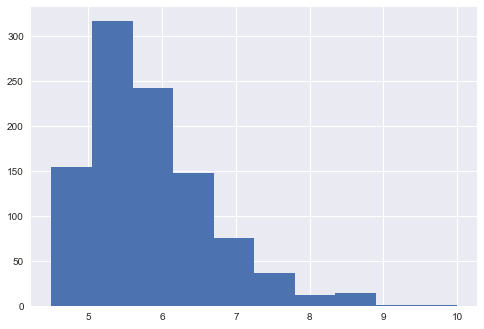

542.707142098


In [160]:
plt.hist(test_labels_lgb,range=[4.5,10])
plt.show()
print(np.mean(pre_lgb))

In [161]:
a=pd.DataFrame(test_labels_lgb,index=None,columns=None)
a.to_csv('E:/medical/data2/a_by_lgb_6.csv')

In [105]:
from xgboost import XGBRegressor
xgb=XGBRegressor(max_depth=300,learning_rate=0.04,n_estimators=400,nthread=3,min_child_weight=2)

G:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
xgb_rmse=rmse_cv(xgb,train_features,train_labels)
print(xgb_rmse)

In [ ]:
xgb.fit(train_features,train_labels)
test_labels_xgb=xgb.predict(test_features)

In [ ]:
print(test_labels_xgb)
pre_xgb=[ np.exp(t)-1 for t in test_labels_xgb]
print(min(pre_xgb),max(pre_xgb))

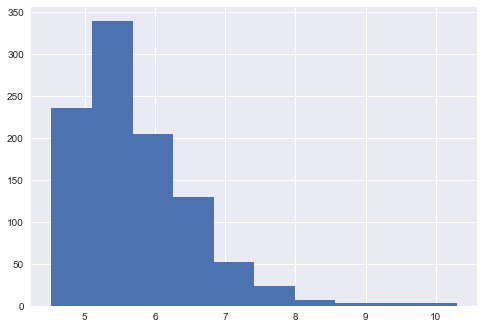

In [209]:
plt.hist(pre_xgb)
plt.show()

In [210]:
a=pd.DataFrame(pre_xgb,index=None,columns=None)
a.to_csv('E:/medical/data/a_by_xgb_我觉行.csv')

In [73]:
from sklearn.svm import SVR


In [76]:
??SVR

[0.17020554830988946, 0.16974734756598259, 0.16874063445484197, 0.16723726400513858, 0.16548320949429668, 0.16681287259470787]


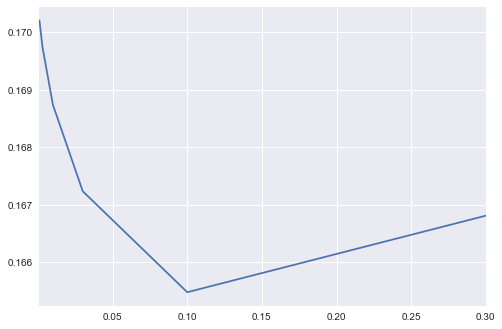

In [74]:

Cs=[0.001,0.003,0.01,0.03,0.1,0.3]
cv_svm=[rmse_cv(SVR(C=c,kernel='rbf'),train_features,train_labels).mean() for c in Cs]
print(cv_svm)
cv_svm=pd.Series(cv_svm,index=Cs)
cv_svm.plot()
plt.show()

In [79]:
svm_model=SVR(C=0.1,kernel='rbf')
svm_model.fit(train_features,train_labels)
test_labels_svr=svm_model.predict(test_features)

In [80]:
print(test_labels_svr)
pre_svr=[ np.exp(t)-1 for t in test_labels_svr]
print(min(pre_svr),max(pre_svr))

[ 1.89132403  1.88961893  1.85500052  1.87984075  1.85260757  1.89999062
  1.88779644  1.8355829   1.88845363  1.88779363  1.84503375  1.91457208
  1.89836021  1.88710283  1.928086    1.87720011  1.87399168  1.88446925
  1.88173858  1.88779375  1.88779363  1.84129564  1.8883068   1.86107538
  1.89234419  1.87510389  1.86731685  1.88769391  1.87981247  1.88721655
  1.8945754   1.86685763  1.89368147  1.88828393  1.83403298  1.87193171
  1.91417322  1.85011026  1.8847761   1.88321742  1.89710273  1.89258191
  1.85677911  1.88443827  1.916035    1.89714567  1.85910327  1.88777072
  1.8705003   1.83782912  1.85944601  1.8313759   1.85862449  1.82633321
  1.86896067  1.86477395  1.82620616  1.88775563  1.86014725  1.88405523
  1.84101774  1.86800474  1.88422803  1.87939098  1.81644583  1.83993374
  1.81024496  1.85063261  1.8878165   1.88055302  1.88549453  1.9039039
  1.88722987  1.88784591  1.89744611  1.85896048  1.86070773  1.89091163
  1.91421765  1.91010479  1.8890482   1.88779355  1.

In [81]:
a=pd.DataFrame(pre_svr)
a.to_csv('E:/medical/data/a_by_svr.csv')